# <b> Time-Series Modeling </b>

## <b> Learning Objectives </b>



In this lesson, we will cover the following concepts:
- Time-series
- Time-series forecasting and time-series analysis
- Steps in a forecasting task
- Visualization of time-series data
  - Time plots
  - Stacked line charts
  - Box plots
  - Lag plots
  - Autocorrelation in data
- Decomposing time-series data
- Algorithms
  - AR
  - MA
  - ARIMA

# <b> What Is a Time-Series? </b>
A time-series is a series of data points indexed, listed, or graphed in time order. Most commonly, a time-series is a sequence taken at successive and equally spaced points in time. Thus, it is a sequence of discrete-time data.

It is a subfield of machine learning and statistics that analyzes temporal data.

![William_Playfair_Interest_of_the_National_Debt_from_the_Revolution_chart](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_06_Time_Series_Modelling/William_Playfair_Interest_of_the_National_Debt_from_the_Revolution_chart.jpg)

One of early plots of time-series data

# <b> What Is Time-Series Forecasting? (Predictive Analytics) </b>
Time-series forecasting is the use of a model to predict future values based on previously observed values. Time-series forecasting is performed in nearly every organization that deals with quantifiable data. Some examples include:
- Retail stores forecasting sales
- Energy companies forecasting reserves, production, demand, and prices
- Educational institutions forecasting enrollments
- The government forecasting tax receipts and spending
- International financial organizations such as the World Bank and International Monetary Fund forecasting inflation and economic activities
- Passenger transport companies use time-series to forecast future travel

 
 
# <b> What Is Time-Series Analysis? (Descriptive Analytics) </b>
Time-series analysis comprises methods for analyzing time-series data in order to extract meaningful statistics and other characteristics of the data. Some examples include:
- Marketing campaign’s effects on retail stores’ sales
- Energy companies use this analysis to see the daily and seasonal effects on power demand
- Educational institutions use this for comparing students’ performance over a period of time
- The government uses it to check the causal effects of its policies or calamities. (How does demonetization affects inflation?)
- Travel companies use this to see how the demand fluctuates in a day, weekend, or holiday.
- Almost all websites use A/B testing to check the performance of the website

Let's see an example of how a company uses both predictive and descriptive analytics to make decisions.


## <b> Steps in a Forecasting Task </b>


![t_model](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_06_Time_Series_Modelling/t_model.PNG)

Now let's look into visualizing time-series data with a use case.

<b> Problem Statement:</b> <br>

The stock market is one of the most highly sought fields these days. Predicting how the stock price is going to behave will always keep us one step ahead.

<b> Objective: </b>

Visualize the data with the help of the following list of plots, and generate a few insights from the data.

- Time Plot
- Stacked Line Charts
- Box Plot
- Lag Plot
- Auto-Correlation Plot

## <b>Dataset Description: </b>
- The Dataset is the average monthly stock price of a beer production company in Australia from 1991 to 2005.

### <b>Import Libraries and Load the Dataset</b>

- To begin, upload the dataset to Jupyter Lab and give the name of the dataset in **pd.read_csv()** function.
- Pandas is a Python library for data manipulation and analysis.
- Numpy is a package that contains a multidimensional array object and several derived ones.
- Matplotlib is a Python visualization package for 2D array plots.
- Seaborn is built on top of Matplotlib and is used for exploratory data analysis and data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

ts = pd.read_csv("stock_price.csv")

In [2]:
ts.head(2)

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891


In [3]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      204 non-null    object 
 1   y       204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [4]:
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()

(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [6]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      204 non-null    datetime64[ns]
 1   y       204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


### Time Plot
- Is a chart for time versus variable that need to be predicted
- Visualizes the pattern (trend and seasonality) in the data
- Aggregates data to weeks, months, quarters, and years, and visualizes better detection patterns
- Enlarges to specific locations inside the data to get a better view

#### Time Plot Example:

Text(0.5, 1.0, 'Stock Price')

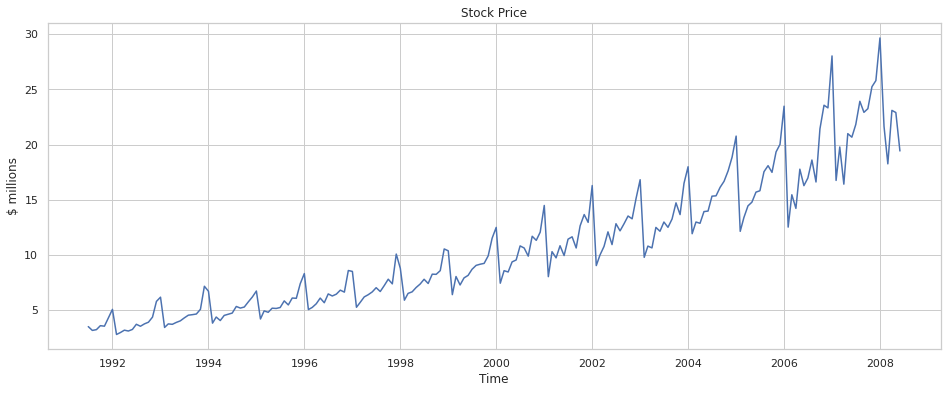

In [7]:
#Setting the size of the plot
plt.figure(figsize=(16, 6))
plt.plot(ts["ds"], ts["y"])
plt.xlabel("Time")
plt.ylabel("$ millions")
plt.title("Stock Price")

### Insights from the Time Plot
- There is a clear and increasing trend
- There is also a strong seasonal pattern that increases in size as the level of the series increases
 
<b>Any forecasts of this series would need to capture the seasonal pattern and the fact that the trend is changing slowly.</b>


### Stacked Line Charts
- These are another way of viewing the time-series data
- Here, we have kept the month on the x-axis, revenue on the y-axis, and year in color

#### Stacked Line Chart Example:

In [8]:
ts["year"] = ts["ds"].dt.year
ts["month"] = ts["ds"].dt.strftime('%b')
ts.head()

,ds,y,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


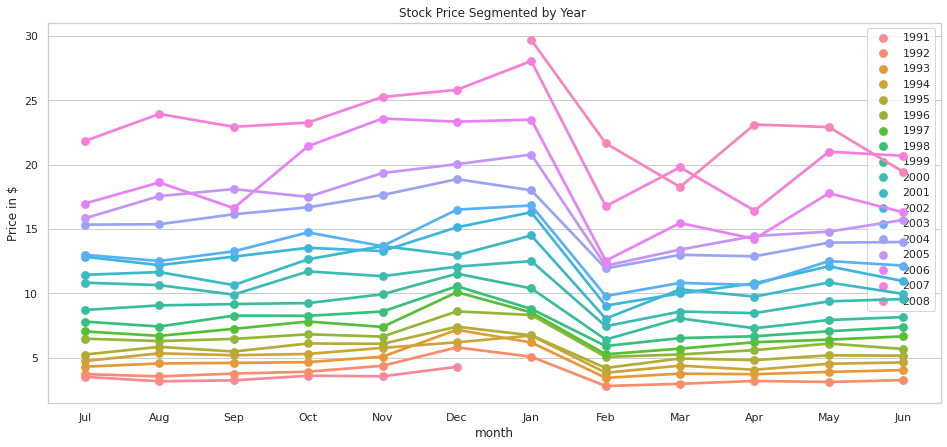

In [9]:
#Setting the size of the plot
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="y", hue="year", data=ts, x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")
plt.legend(loc='upper right')
plt.show()

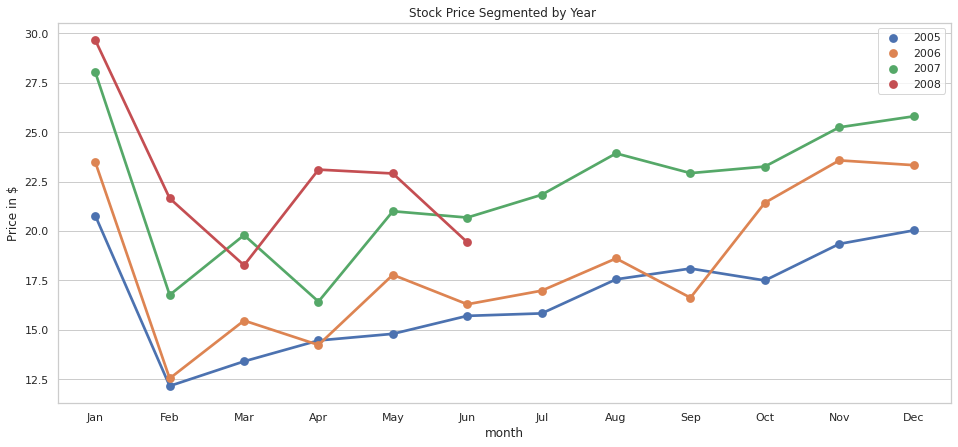

In [11]:
#Setting the size of the plot
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="y", hue="year", data=ts[ts.year>2004], x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")
plt.legend(loc='upper right')
plt.show()

In [12]:
ts['ds'].max()

Timestamp('2008-06-01 00:00:00')

 
### Insights from the Stacked Line Charts
- There is a large jump in price in January each year.
- The graph also shows the drop in the price in March 2008 (most of the other years show an increase between February and March.)

### Box Plot

- Box and whisker plot is useful when large numbers of observations are involved and when two or more datasets are being compared. 
- Boxplot is a standardized method of depicting data distributions based on a five-number summary ("minimum", "first quartile (Q1)", "median", "third quartile (Q3)", and "maximum").
- <b>First quartile (Q1/25th Percentile):</b> The middle number between the smallest number and the median of the dataset
- <b>Median (Q2/50th Percentile):</b> The middle value of the dataset
- <b>Third quartile (Q3/75th Percentile):</b> The middle value between the median and the highest value of the dataset
- <b>Interquartile range (IQR):</b> 25th to the 75th percentile

#### Box Plot Example:

Text(0.5, 1.0, 'Stock Price Segmented by Year ')

<Figure size 1152x504 with 0 Axes>

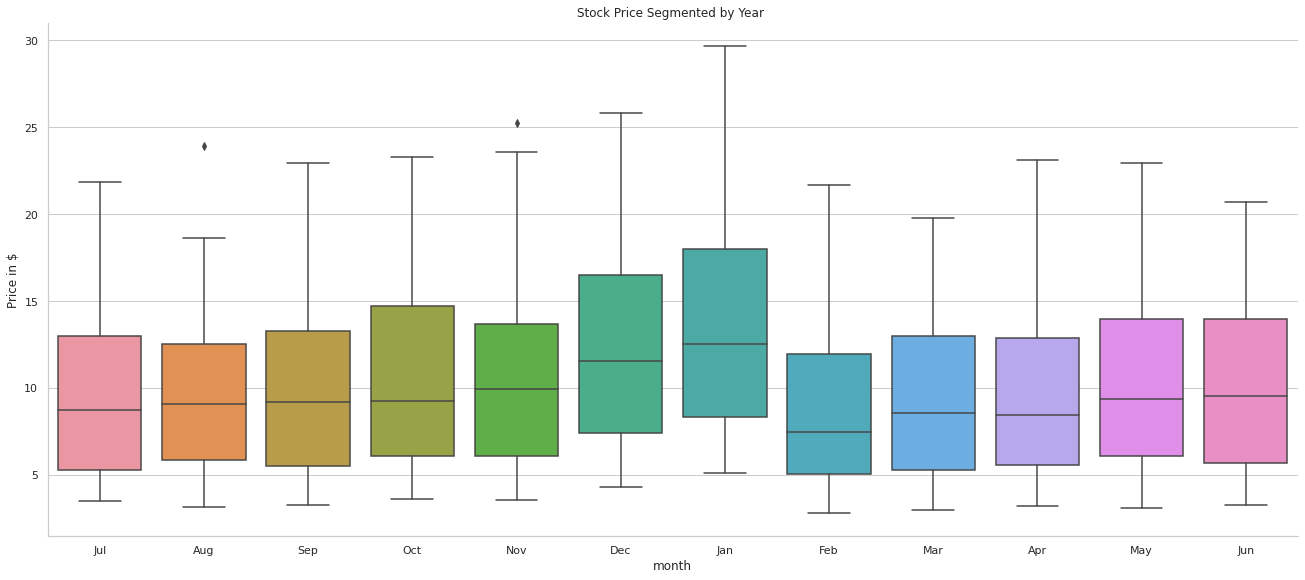

In [13]:
import warnings
warnings.filterwarnings('ignore')
#Setting the size of the plot
plt.figure(figsize=(16, 7))
sns.factorplot(x="month", y="y", data=ts, kind="box", row_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("Price in $")
plt.title("Stock Price Segmented by Year ")

### Insights from Box Plot
- There are fluctuations in stock prices of different months.
- The graph also shows outliers in August and November which are represented by small dots.

## Lag Plot
- A lag plot checks whether a dataset or time-series is random or not.
- Random data should not exhibit any identifiable structure in the lag plot.
- Nonrandom structure in the lag plot indicates the lack of randomness in the underlying data.

#### Lag Plot Example:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

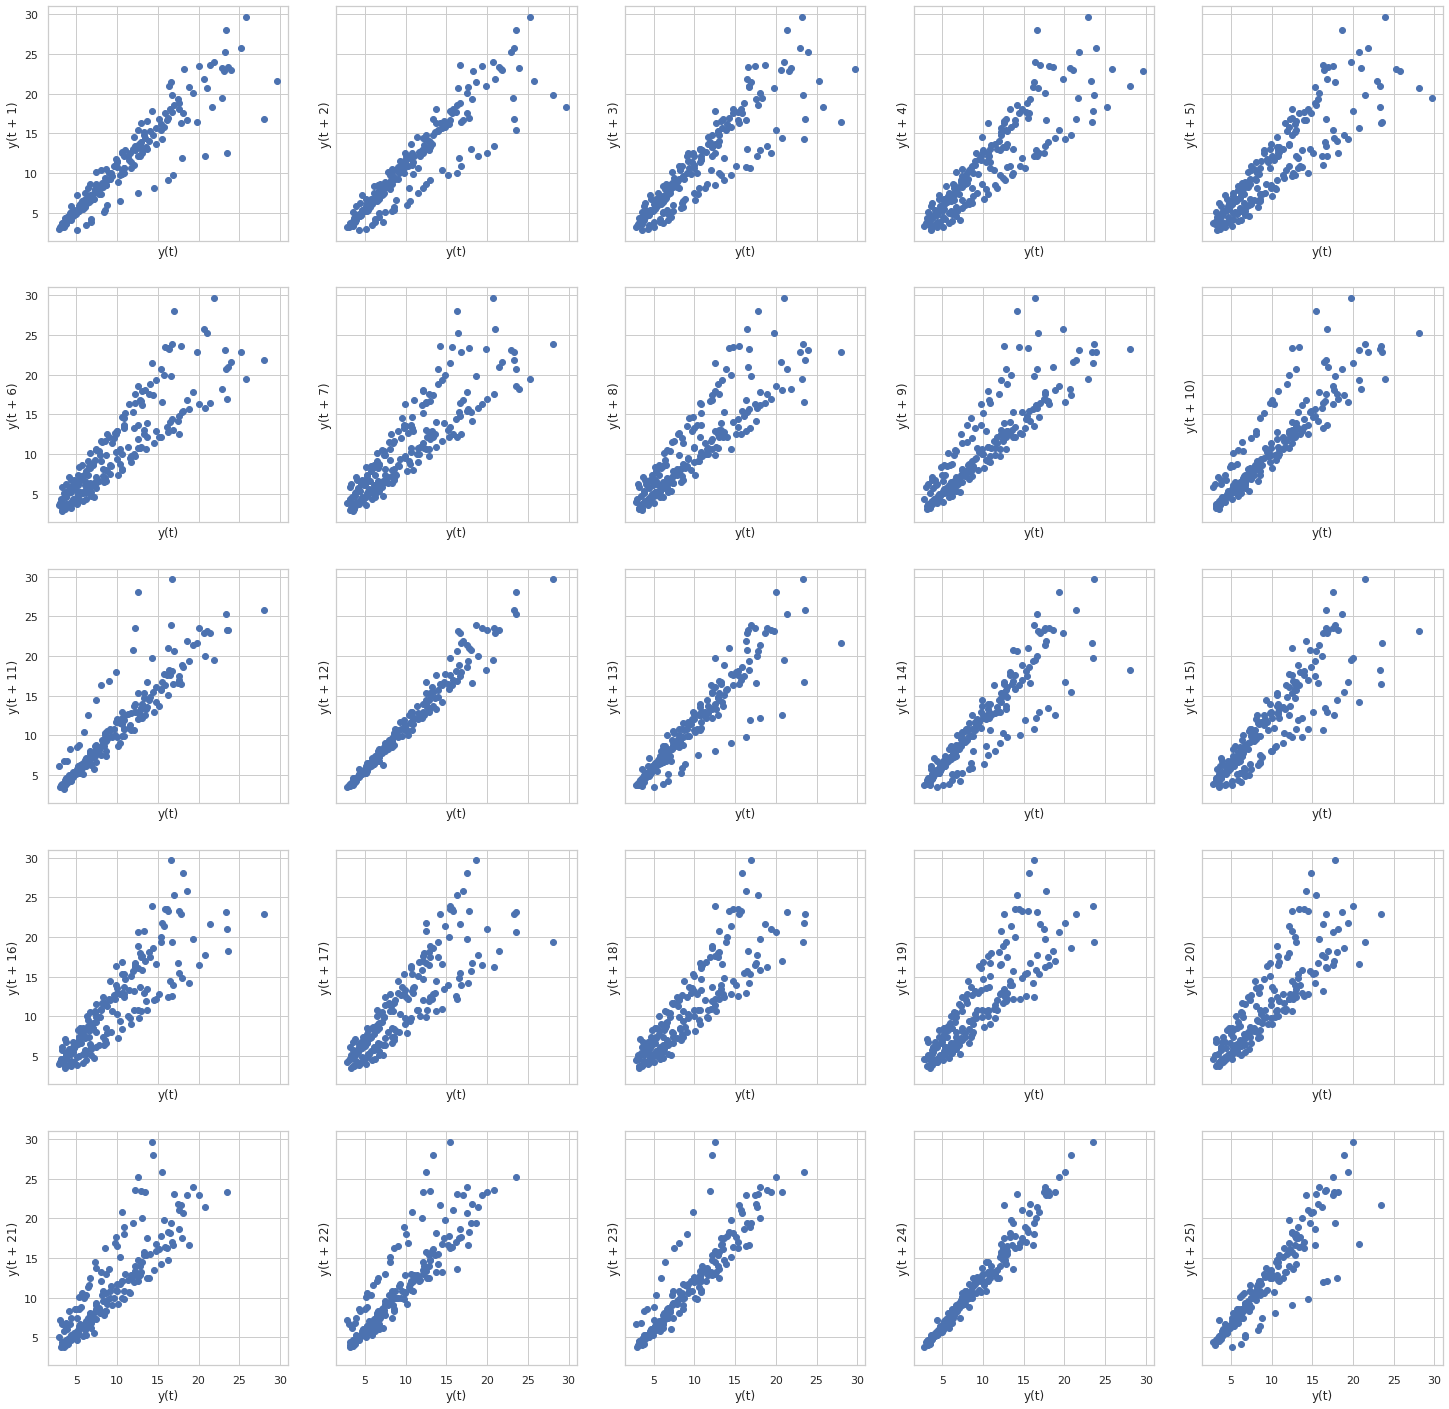

In [14]:
#Plotting 25 lag plots to determine randomness in data.
from pandas.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(ts["y"], lag=count, ax=axes[i, j])
        count+=1

### Insights from Lag Plot
- The plot displays patterns, indicating that the data is not random.

## Autocorrelation Plot 
- It is designed to show whether the elements of a time-series are positively correlated, negatively correlated, or independent of each other.
- Correlation simply means association, and measures how closely two variables are related.
- A positive correlation is a two-variable association in which both variables move in the same direction. As a result,when one variable increases the other increases, or when one variable decreases the other decreases.
- A negative correlation is a link between two variables in which an increase in one variable causes the other to decrease.
- When there is no correlation between two variables, it is called a zero correlation.
- It is similar to lag plots.

#### Autocorrelation Plot Example:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

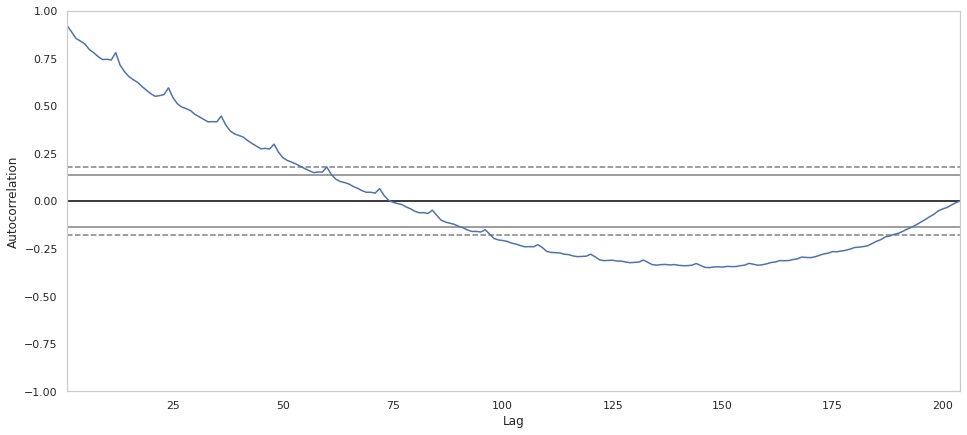

In [15]:
#Plotting graph to determine autocorrelation
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
autocorrelation_plot(ts["y"])

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

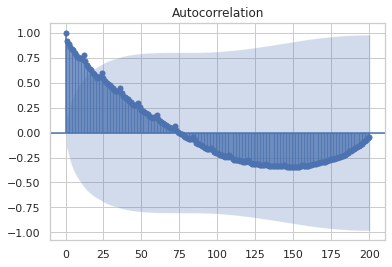

In [20]:

plot_acf(ts['y'],lags=200)
plt.show()

### Insights from Autocorrelation Plot
- The graph depicts a downward trending negative trend from left to right, indicating negative autocorrelation.

# <b> Decomposing Time-Series Data </b>
- Decomposing a time series entails considering it as a collection of level, trend, seasonality, and noise components.
- The two components of time series are: Systematic Components refer to the fact that the time series has a system, or recurrence that can be described and, Non-Systematic Components are those that cannot be modeled.

## White Noise
- A time-series is white noise if the variables are independent and identically distributed with a mean of zero.
- All variables have the same variance, and each value has a zero correlation with all other values in the series.
- If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.


### Time series is not white noise if any of the following conditions are true
- If the series has a zero mean
- If the variance changes over time
- If values correlate with lag values

### How to Detect White Noise?
- Check the mean and variance over a period of time by taking different intervals.
- Create a correlogram and check for any autocorrelation with lag variables.

## Random Walk
A random walk is another time-series model where the current observation is equal to the previous observation with a random step up or down.

Is your time-series a random walk?

- The time-series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time-series is not stationary, and making it stationary shows no obvious learnable structure in the data.
    - Draw a correlogram of autocorrelations. Check if there is any correlation with the lag variable.
    - Make the data stationary (discussed later), and check if there is any correlation with the lag variable. If point one has and point two doesn't, then your data is a random walk.

- The persistence model provides the best source of reliable predictions. If your baseline models are performing well compared to all the models you build, you are dealing with a random walk.


## <b> Important Terms Related to Time-Series Data </b>

<b>Trend:</b>
- A trend exists when there is a long-term increase or decrease in the data and does not have to be linear. Sometimes, a trend is referred to as changing direction, when it goes from an increasing trend to a decreasing one. There is a trend in the antidiabetic drug sales data.

<b>Seasonality:</b>
- A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency.

<b>Residuals:</b>
- When you remove the trend, seasonality, and other observable patterns from the data, white noise is left, and this is termed as residuals.

In [21]:
#Decomposing to see the white noise.
decompose = ts[["ds", "y"]]

In [23]:
decompose.head(2)

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891


In [24]:
decompose.set_index('ds',inplace=True)
decompose.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


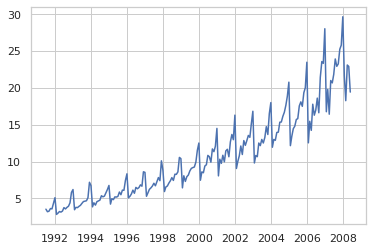

In [25]:
plt.plot(decompose.y)

### Importing Decomposition model and plotting graph on Trend, Seasonality, and Residuals.

In [26]:
#Importing Decompose Model and plotting graph to see Trend, Seasonality, and Residuals 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)

In [27]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

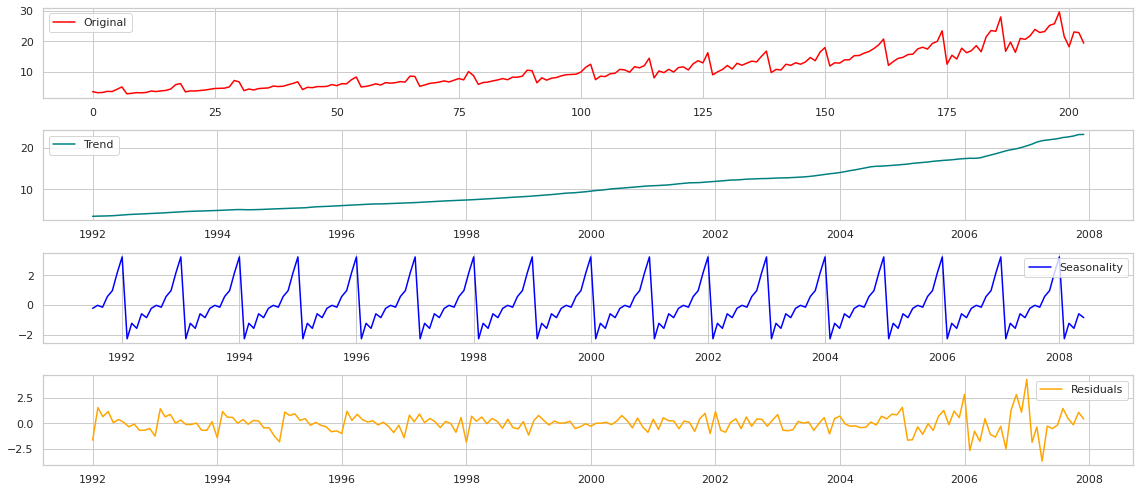

In [33]:
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["y"], label='Original',color='red')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend',color='teal')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals',color='orange')
plt.legend(loc='best')
plt.tight_layout()

In [36]:
decomposition_m = seasonal_decompose(decompose,model='multiplicative')

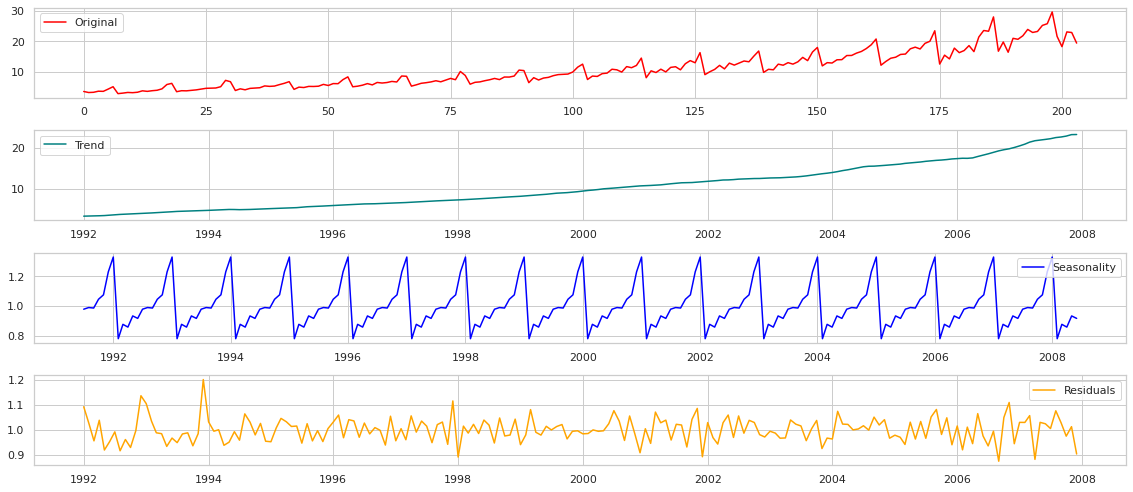

In [37]:
trend_m = decomposition_m.trend
seasonal_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(ts["y"], label='Original',color='red')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_m, label='Trend',color='teal')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_m,label='Seasonality',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_m, label='Residuals',color='orange')
plt.legend(loc='best')
plt.tight_layout()

### Insights from Decomposition model
- The graph depicts a raise in trend, seasonality, and residuals over the period from 1992 to 2008.

### <b> We have learned all the components to build a time-series predictive model, so let's proceed to step 2.</b>

<b> Problem Statement:</b> <br>

The stock market is one of the most highly sought fields nowadays. Predicting how the stock price is going to behave will always keep us one step ahead.

<b> Objective: </b>

 - Check for the stationarity of your data using the Rolling Statistics and Dickey-Fuller test. If stationarity is present, remove it using differencing in Python.
 
- Perform AR, MA, and ARIMA modeling in Python after obtaining ACF and PACF plots.


### <b>Import Libraries and Load the dataset</b>
- To begin, upload the dataset to Jupyter Lab and give the name of the dataset in pd.read_csv.

In [ ]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

ts = pd.read_csv("stock_price.csv")
ts["ds"] = pd.to_datetime(ts["ds"])
print(ts.shape)
ts.head()

(204, 2)


,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [39]:
import datetime
import math
from sklearn.metrics import mean_squared_error

### Import the Data

In [40]:
tss = pd.read_csv("stock_price.csv")
tss["ds"] = pd.to_datetime(tss["ds"])
tss.index = tss["ds"]
tss = tss[["y"]]
print(tss.shape)
print(tss.head())
x_train = tss[tss.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = tss[tss.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(204, 1)
                   y
ds                  
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
(162, 1) (42, 1)


## Stationary

### What Is Stationary?
- A stationary time-series is one whose properties do not depend on the time at which the series is observed. Therefore, time-series with trends or with seasonality are not stationary.
- A white noise series is stationary.
- It does not matter when you observe it, it should look much the same at any point in time.

### Why Should Stationary Data Be Considered?
ARIMA models assume the data to be stationary. It will be clear soon when we model the data. Let’s look at how to convert nonstationary data to stationary data. 

`Note: Let's know the concept of differencing in order to perform it.`

### What Is Differencing?
- Computing the difference between consecutive numbers is called differencing.
- Transformations such as logarithms can help to stabilize the variance of a time-series. Differencing can help stabilize the mean of a time-series by removing changes in the level of a time-series, therefore eliminating or reducing trend and seasonality.

#### Second-order differencing
- Occasionally, the differenced data will not appear to be stationary, and it may be necessary to differentiate the data a second time to obtain a stationary series.

\begin{align*}
y'_{t}= y_{t} - y_{t-1} \\
y'_{t}= (y_{t} - y_{t-1}) - (y_{t-1}-y_{t-2}) \\
y'_{t}= y_{t} - 2*y_{t-1} +y_{t-2} \\
\end{align*}

Visualizing stationary is a mess. Can't we quantify it? Statistical tests are our saviors.
- <b>Augmented Dickey-Fuller (ADF) Test</b>:
    - Null Hypothesis: data is nonstationary.
    - Large p-values are indicative of nonstationary, and small p-values suggest stationary. Using the usual 5% threshold, differencing is required if the p-value is greater than 0.05.  

 ### Stationarity Check

In [42]:
from statsmodels.tsa.stattools import adfuller

adfuller(ts['y'])

Test Statistic                   2.228300
p-value                          0.998905
#Lags Used                      14.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64


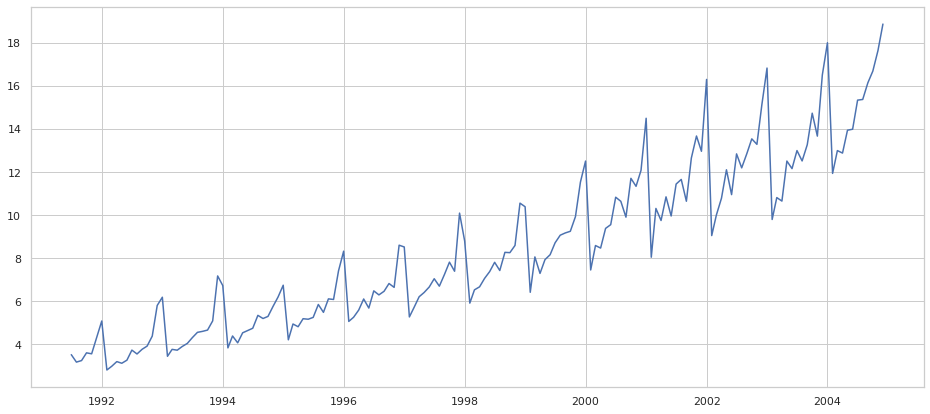

In [43]:
#Defining a custom function to perform Stationarity Test on the data
def stationarity_test(data):
    dftest = adfuller(data.y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.y)
    plt.show()

stationarity_test(x_train)

### Insights from Stationary Check
- The data is highly nonstationary.
- We need to apply log transformations to make variance constant.

The test statistic is more than the critical value, and the moving average is not constant over time.

So, the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the time-series is not stationary.


In [46]:
ts['y']

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: y, Length: 204, dtype: float64

Test Statistic                  -0.292347
p-value                          0.926581
#Lags Used                      14.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


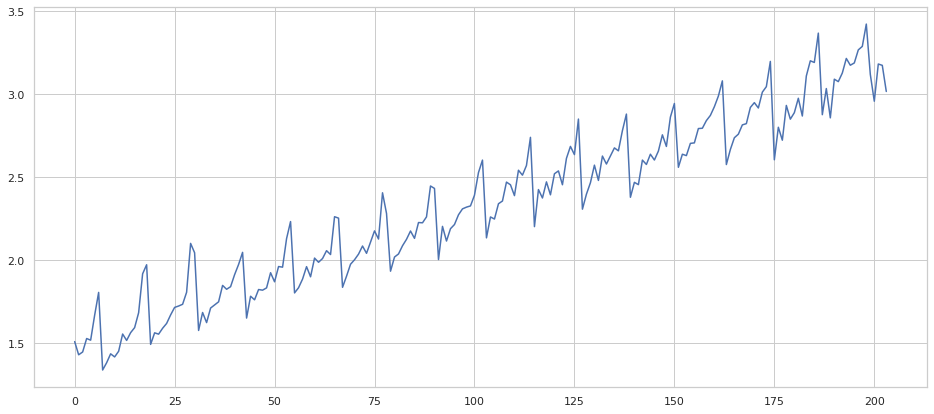

In [48]:
#Now take the log (To make variance constant) and check for stationary again 
import numpy as np
ts['y'] = np.log1p(ts['y'])
stationarity_test(ts)

### Insights from Stationary Check
- The data is still highly nonstationary, but the variance has become constant.
- Let's remove seasonality and check; subtracting every nth term with n-12th term will let us do this.

In [1]:
#Defining a custom function to perform Stationarity Test on the data
def stationarity_check(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    plt.figure(figsize=(16, 7))
    plt.plot(ts)
    plt.show()

In [52]:
ts_diff1=ts.y.diff(1).dropna()

Test Statistic                  -3.886155
p-value                          0.002139
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (1%)             -3.465812
Critical Value (5%)             -2.877123
Critical Value (10%)            -2.575077
dtype: float64


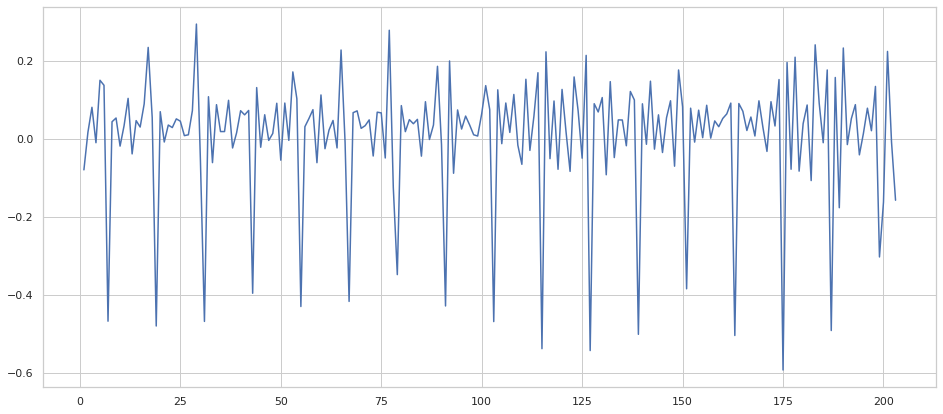

In [53]:
stationarity_check(ts_diff1)

Test Statistic                  -4.034900
p-value                          0.001238
#Lags Used                      13.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64


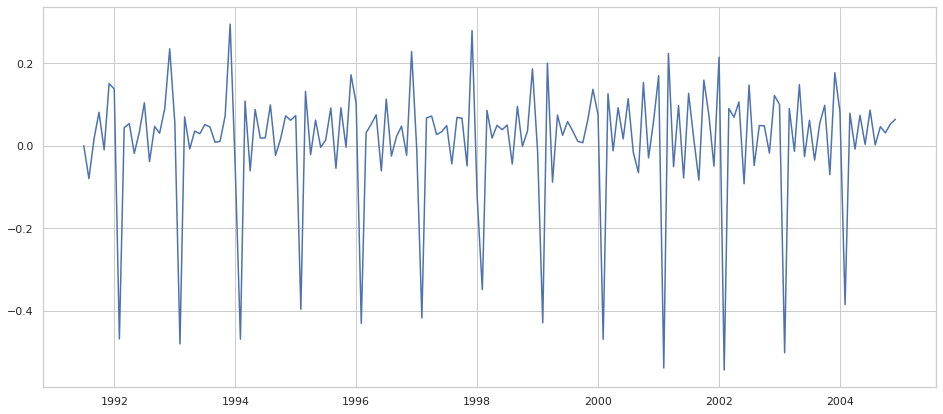

In [ ]:
first_diff = log_train["y"] - log_train["y"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                -1.589480e+15
p-value                        0.000000e+00
#Lags Used                     1.500000e+01
Number of Observations Used    1.880000e+02
Critical Value (1%)           -3.465620e+00
Critical Value (5%)           -2.877040e+00
Critical Value (10%)          -2.575032e+00
dtype: float64


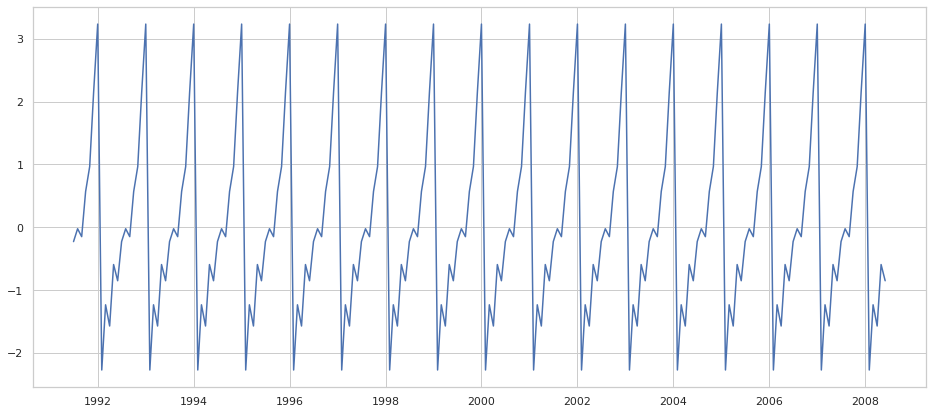

In [55]:
stationarity_check(seasonal)

### Insights from Stationary Check
- The P-value is less than 0.05, and we have achieved stationarity.
- A time-series with cyclic behavior (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series, we cannot be sure where the peaks and troughs of the cycles will be.

Let’s also look at what happens if we use seasonal differencing. This might be useful when we model seasonal ARIMA models. 

Test Statistic                  -5.079978
p-value                          0.000015
#Lags Used                      11.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


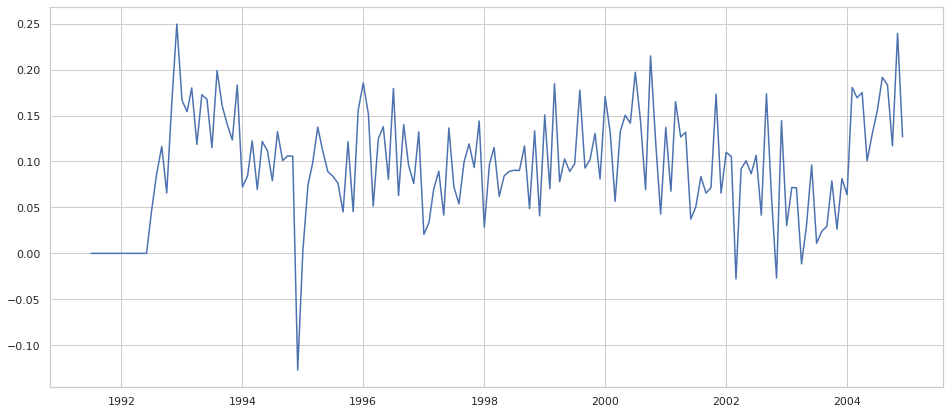

In [ ]:
#Using Seasonal Differentiating for stationary check
seasonal_data_differenced = log_train["y"] - log_train["y"].shift(12)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

### Insights from Seasonal Differentiating
- The p-value is less than 0.05, and we can clearly see that the differencing has led to the stationarity of data.

Let's quickly jump to ARIMA literature and modeling. 

## Auto-Regressive Models or AR(p)
- An autoregressive model predicts future behavior using data from the past. When there is some correlation between values in a time series and the values that precede and succeed them, it is utilized for forecasting.
- We forecast the variable of interest using a linear combination of predictors. 

An AR(p) model is denoted by:

\begin{align*}
y_{t} = c+ \phi_{1} * y_{t-1} + \phi_{2} * y_{t-2} + .... + \phi_{p} * y_{t-p} + e_{p}
\end{align*}

where, $e_{t}$ is the white noise

yt-1, yt-2…yt-p are the past series values (lags),

#### Why Does ARIMA Assume Stationarity? 
- There is a problem of multicollinearity if the data is nonstationary. 

## Moving Average Models or MA(q)
- Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

A MA(q) model is denoted by:

\begin{align*}
y_{t} = c+ \theta_{1} * e_{t-1} + \theta_{2} * e_{t-2} + .... + \theta_{p} * e_{t-q} 
\end{align*}

- Unlike AR, we don't do any regression. We take the outputs of the AR model, measure the errors, and model these errors using the function above.

### Number of Differences (d): 
- These are the number of nonseasonal differences to be performed on the data for achieving stationarity.

Finally, we model **ARIMA(p, q, d)**, and find out **p, q, d** values. This is the major task in building models using the ARIMA class of models.

Let’s have a look at how this is achieved.

### Modeling Arima Models Using Python
- In order to model, we have to figure out what values do p, q, and d take. From the stationarity test, we have already observed that d=1.

- To find the values of p and q, we need to look at the ACF and PACF plots.

 <b>Autocorrelation Function (ACF)</b> is useful to estimate q.<br>
ACF is the coefficient of correlation between the value of a point at a current time and its value at lag p, that is, the correlation between Y(t) and Y(t-p).

 <b>Partial Autocorrelation Function (PACF)</b> is useful to estimate p.<br>
PACF is similar to ACF, but the intermediate lags between t and t-p are removed, that is, the correlation between Y(t) and Y(t-p) with p-1 lags is excluded.


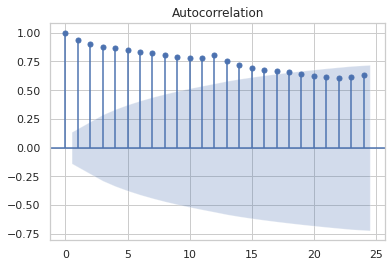

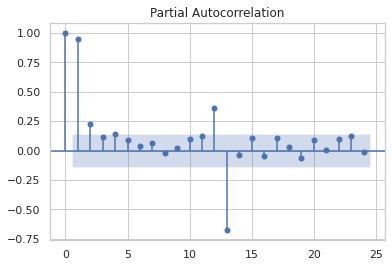

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts.y)
plt.show()

plot_pacf(ts.y)
plt.show()

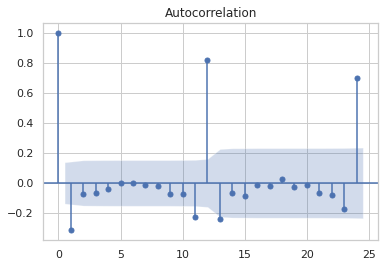

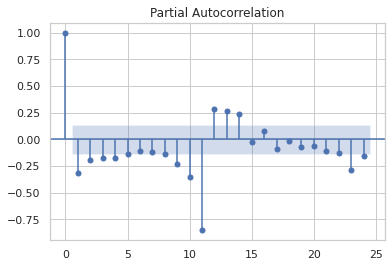

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(ts.y.diff(1).dropna())
plt.show()

plot_pacf(ts.y.diff(1).dropna())
plt.show()

### Characteristics of ACF and PACF for Different Models

![ar](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/Lesson_06_Time_Series_Modelling/ar.JPG)

### Plotting ACF and PACF plots:

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


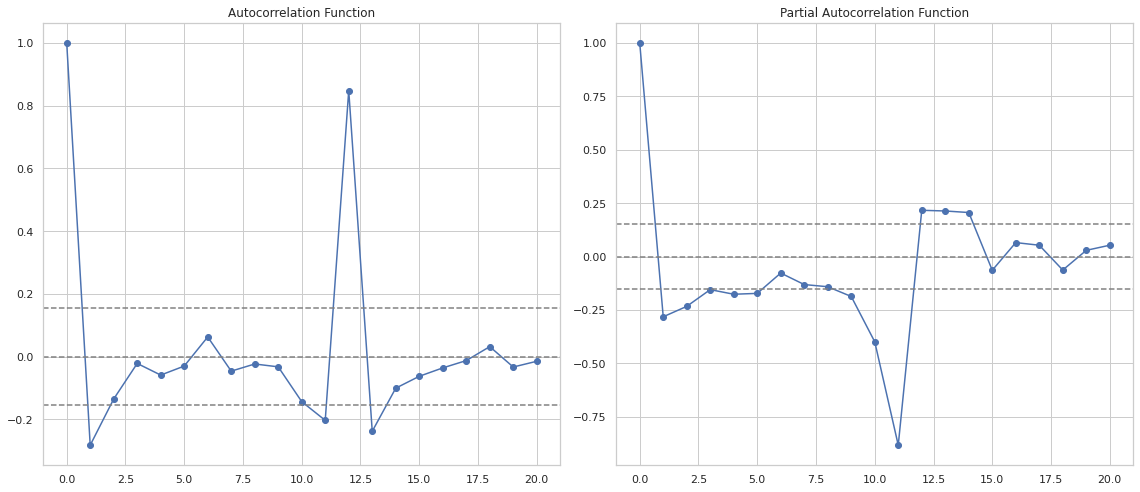

In [ ]:
#Setting values for lag parameters for ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')
plt.figure(figsize=(16, 7))

#Plotting ACF plot: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plotting PACF Plot:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

 ### Insights from ACF and PACF Plots
 1. **p**: This is the lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case, p=1 has a positive correlation and p=12 has a high negative correlation.

 2. **q**: This is the lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case, q=1 and q=12 have a very high positive correlation.

In [70]:


#Plotting AR Model with p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)

NameError: name 'log_train' is not defined

2306514011.1171637


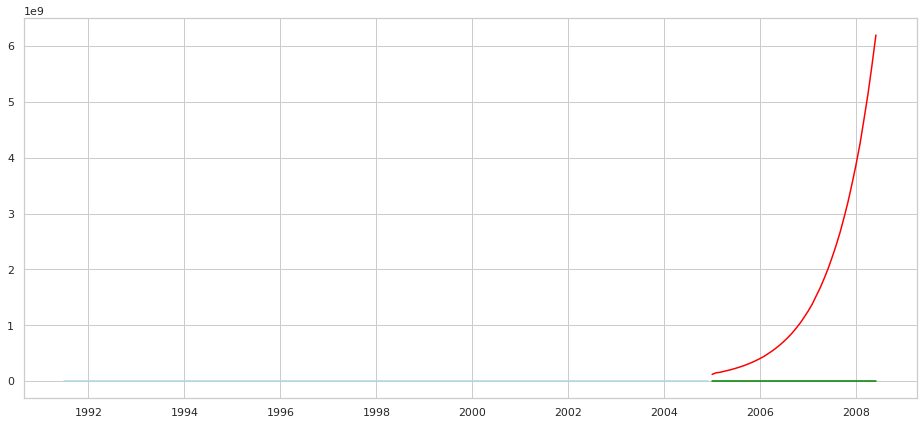

In [ ]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")

#Code for checking Forecasting
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

#Code for Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

### Insights from AR Model
- RMSE: 4.74. We can do better than this. Let's see what an MA model provides.

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


3.2033966662762317


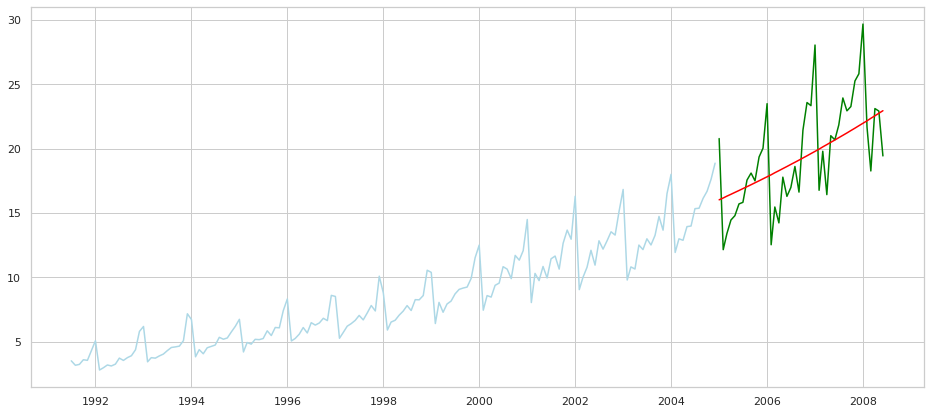

In [ ]:
#Plotting MA Model with p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  

plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")


#Code for checking Forecasting
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index


#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)


#Code for Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

### Insights from MA Model
- RMSE: 3.20. This is better than the AR model. MA is better at smoothing the time-series graph and gives a linear trend while predicting.

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 103.570
Method:                       css-mle   S.D. of innovations              0.125
Date:                Thu, 03 Feb 2022   AIC                           -199.139
Time:                        05:49:17   BIC                           -186.814
Sample:                    08-01-1991   HQIC                          -194.135
                         - 12-01-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.000     27.654      0.000       0.008       0.009
ar.L1.D.y      0.3060      0.076      4.039      0.000       0.158       0.454
ma.L1.D.y     -0.9999      0.016    -63.076      0.0

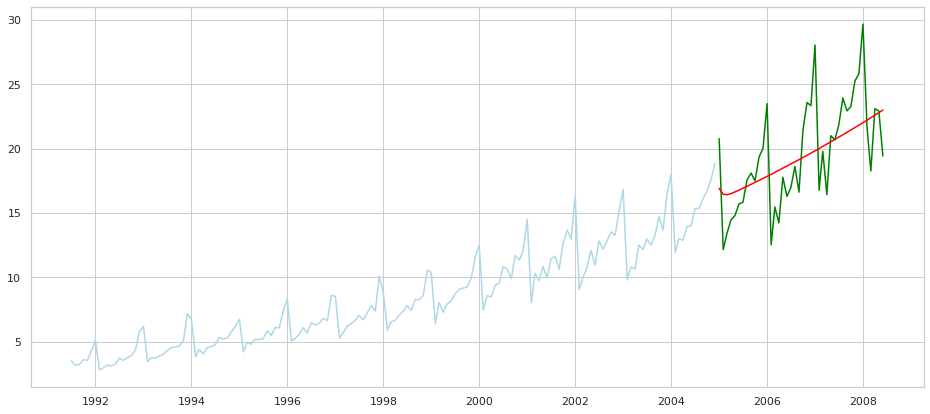

In [ ]:
#Using both AR and MA with differencing and applying ARIMA Model with p=1, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())

plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.values, color="lightblue")
plt.plot(x_test.index, x_test.values, color="green")


#Code for checking Forecasting
pred = pd.DataFrame(results_ARIMA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index


#Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)


#Code for Measuring error. 
measure = math.pow(mean_squared_error(x_test.values, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

### Insights from ARIMA Model
- RMSE: 3.18 is slightly better than both the previous MA models and much better than AR models.

- Akaike’s Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model. The lesser value, the better the model.

## Excercise

Let's load the data first

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('monthly-champagne-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
X = df['Month']
y = df['Sales']
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


You are provided with a dataset that contains monthly sales of a wine company. Perform the following tasks using the dataset.

1. Plot a time plot for the sales column.
2. Plot a box plot for the sales column showing sales, month-wise.
3. Split data into train and test. Fit an ARIMA model on the data.
4. Predict your test data, and calculate the squared error.


**Note: In this lesson, we saw the use of the time-series modeling methods, and in the next lesson, we will be working on Ensemble Learning.**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)